<a href="https://colab.research.google.com/github/NaithaniAR/-Play-Store-App-Review-Analysis/blob/main/EDA_PROJECT_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

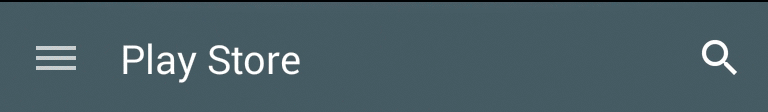

## <b> INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 



 

### **Description of App Dataset columns**



1 App : The name of the app

2 Category : The category of the app

3 Rating : The rating of the app in the Play Store

4 Reviews : The number of reviews of the app

5 Size : The size of the app

6 Install : The number of installs of the app

7 Type : The type of the app (Free/Paid)

8 The price of the app (0 if it is Free)

9 Content Rating :The appropiate target audience of the app

10 Genres: The genre of the app

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




### **Load Necessary Libraries**


In [ ]:
import matplotlib.pyplot as plt          
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Exploring google play store data**



In [ ]:
#Reading the csv file 

#df=pd.read_csv('/content/drive/MyDrive/datasets almabetter/Play Store Data.csv')
df=pd.read_csv('/content/drive/MyDrive/Datasets/GG/Play Store Data.csv')

In [ ]:
#Top 5 rowsa of the dataset 

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.rank()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,7749.0,34.0,2920.5,2747.0,2046.5,3539.5,5021.0,5820.5,4360.5,739.5,3617.5,1086.5,3904.0
1,2874.5,34.0,1805.5,10727.5,1220.5,10499.0,5021.0,5820.5,4360.5,778.5,3247.5,5068.0,3904.0
2,9674.0,34.0,8522.0,10327.0,8430.0,8550.5,5021.0,5820.5,4360.5,739.5,769.0,3090.5,3904.0
3,8724.0,34.0,6930.5,4200.0,3430.0,9755.0,5021.0,5820.5,10234.5,739.5,8046.5,10031.0,7303.5
4,7818.0,34.0,4764.5,10727.5,2579.0,6622.0,5021.0,5820.5,4360.5,774.0,7307.5,2104.5,8233.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,9115.0,2931.5,6930.5,6663.0,6850.0,7936.0,5021.0,5820.5,4360.5,2991.0,5172.5,3832.0,5881.0
10837,5014.0,2931.5,9229.5,6905.0,4356.0,5678.0,5021.0,5820.5,4360.5,2991.0,6620.0,610.0,5881.0
10838,7668.0,6819.0,NaN,5654.0,8805.5,536.0,5021.0,5820.5,4360.5,5966.0,3358.5,610.0,434.5
10839,9377.0,320.0,6930.5,1447.0,9994.0,536.0,5021.0,5820.5,9381.0,1096.0,3310.5,10031.0,10157.5


In [ ]:
#last rows of the dataset

df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
#No of rows and column of the dataset

df.shape

(10841, 13)

**there are a total of 10841 rows and 13 columns in this .csv file let's see the column type of our dataset**

In [ ]:
#info function will tell you the count of null values and the data type of our columns

df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


 **We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type.**


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Data   Cleaning**
 “The more data we have, the more likely we are to drown in it.” 
 —Nassim Taleb
 
 “More data beats clever algorithms, but better data beats more data.” 
 — Peter Norvig`

### Duplicate values


In [ ]:
# df has 10841 observation before cleaning. 

df.shape 

(10841, 13)

In [ ]:
#df has 1181 duplicate App's before cleaning. 

df[df['App'].duplicated()]  



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [ ]:
#Dropping duplicate values

before = len(df.index)                                                                   #Length of original Dataframe 
print('Total entries with duplicates were '+ (str(before)))
ddf=df.drop_duplicates(subset=['App'], keep='first', inplace=False, ignore_index=True)   #Drop duplicates with a value in a specific column.
after = len(ddf.index)                                                                   #Length of duplicated Dataframe 
print('Total entries after duplicates were dropped are '+ (str(after)))
print('Total '+ (str(before-after))+' entries were dropped.')

Total entries with duplicates were 10841
Total entries after duplicates were dropped are 9660
Total 1181 entries were dropped.


In [ ]:
 # we have successfully removed duplicate values and the new shape of 9660 rows × 13 columns is realised. 

 ddf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9657,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#Checking for duplicate values 


duplicate =ddf.groupby(['App']).agg({'Category': 'count'}).reset_index()  
duplicate = duplicate.sort_values(by=['Category'], ascending=False)
duplicate.head(20)

,App,Category
0,"""i DT"" Fútbol. Todos Somos Técnicos.",1
6434,My Talking Tom,1
6436,My Teacher - Classroom Play,1
6437,My Telcel,1
6438,My Tele2,1
6439,My Theme Park: RollerCoaster & Water Park Tycoon,1
6440,My Truck,1
6441,My Virtual Boyfriend,1
6442,My Vodacom SA,1
6443,My Vodafone (GR),1


### **Rating**

In [ ]:
ddf['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

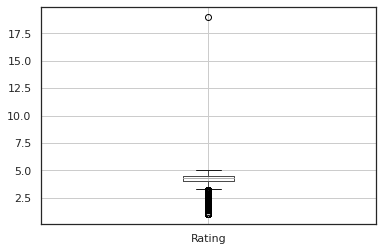

In [ ]:
# Making Boxplot for rating 

ddf.boxplot()  

Since rating can range from 1 to 5 we can observe the presence of an outlier.

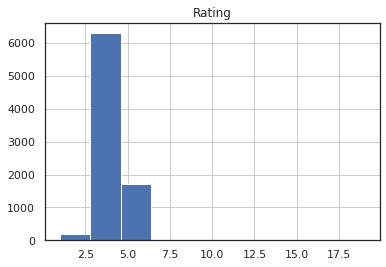

In [ ]:
ddf.hist();

In [ ]:
# Print outlier 

ddf[ddf.Rating>5] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN




We observe the data frame [9300] has shifted values.

In [ ]:
# Dropping the row to maintain logical consistency 

ddf.drop([9300],inplace=True) 

# Resetting index after dropping column

ddf.reset_index(drop=True, inplace=True) 

In [ ]:
#Index has beeen reset 

ddf.iloc[9299:9301]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9299,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9300,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


We have removed the logical inconsistency, outlier and reset the index.

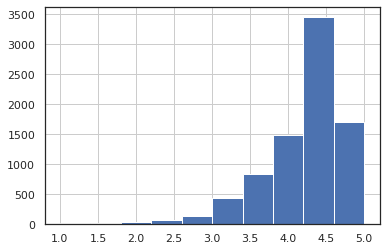

In [ ]:
# Plotting histogram

ddf['Rating'].hist(); 


After treating the outlier we observe the rating values range from 1 to 5 

In [ ]:
# Printing Total null values in rating  

ddf['Rating'].isnull().sum() 

1463

We observe there are 1465 null values in ratings column 

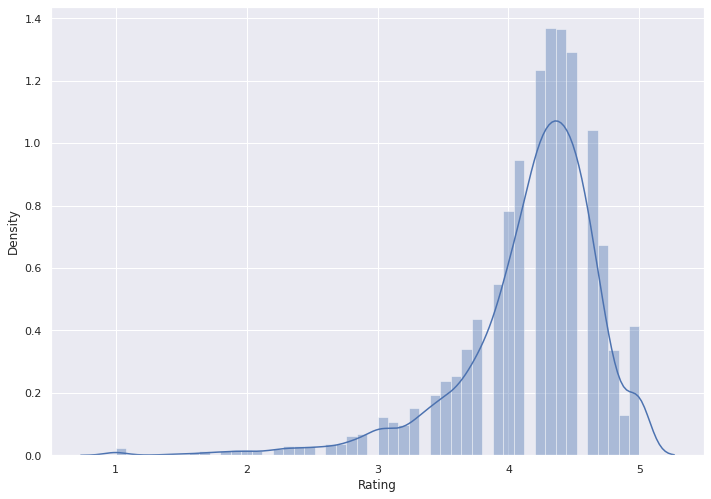

In [ ]:
#Plot Before we treat null values. 

sns.set(rc={'figure.figsize':(11.7,8.25)}) 
ax = sns.distplot(ddf['Rating'])

From the above graph, we can come to the conclusion that most of the apps in the google play store are rated between 3.5 to 4.8


In [ ]:
#Imp

impute_median=ddf['Rating'].median()                     
ddf['Rating']=ddf['Rating'].fillna(impute_median)       

You may note that the data is skewed and is not a catagorical data, hence it is not recommended to use the mean/mode for replacing the missing values
Using mean/mode values for replacing missing values may not create a great model and hence it gets ruled out. 



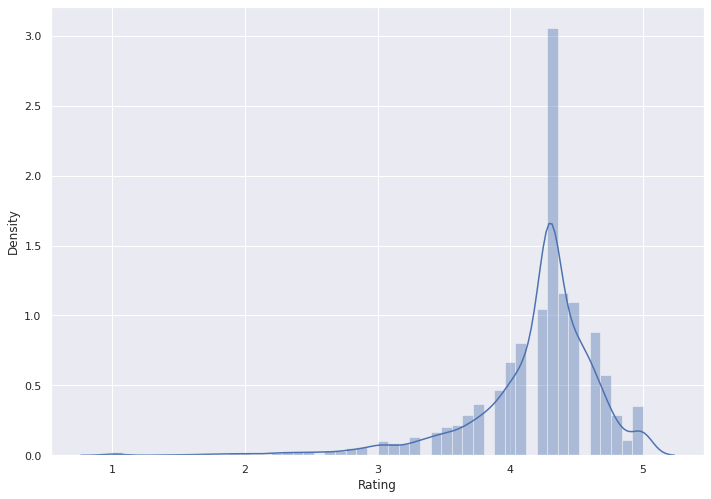

In [ ]:
#Plot after we fill NaN values

sns.set(rc={'figure.figsize':(11.7,8.25)}) 
ax = sns.distplot(ddf['Rating'])


we can observe little to no devation from the original plot. 

### **Install & Price**

In [ ]:
# Printing unique values price
ddf[('Installs')].unique() 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

We observe that there are unwanted characters in the dataset and the data type of the data is of object type.

In [ ]:
#Printing unique values for price

ddf[('Price')].unique()  

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# List of Symbols names to clean

chars_to_remove = ['+', ',' , '$' ]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
        Expen[col] = Expen[col].astype(str).str.replace(char, '')

Price

In [ ]:
 # Convert col to numeric
ddf['Price'] = pd.to_numeric(ddf['Price']) 


In [ ]:
ddf[('Price')].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

Unwanted characters such as '$' has been removed.

In [ ]:
# checking for null values

ddf['Price'].isnull().sum() 

0

In [ ]:
# We can observe that the data type is changed to float type 

ddf[('Price')].describe() 

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

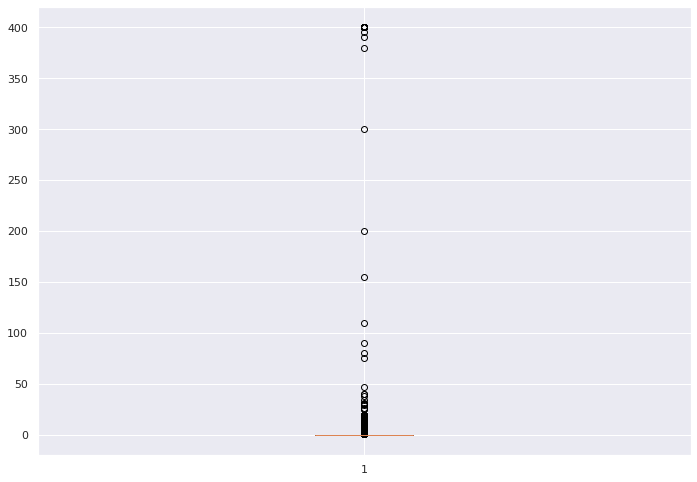

In [ ]:
#Create a box plot for the price column

plt.boxplot(ddf.Price)
plt.show()

In [ ]:
print(ddf[ddf.Price>30].shape)  


(29, 13)




*   We observe that there are 29 apps which are outliers for price app, since the majority of apps lie between 0-30$.
*   Scope of this project is limited to analysis we will leave it as is.




In [ ]:
# Checking data for logical inconsistency, there are none present 

ddf[(ddf.Type == "Free") & (ddf.Price > 0)] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Our Data is Logically Consistant

In [ ]:
# Storing data sets for Future use: 
ddf_free=ddf[ddf.Price<=0.0];
ddf_paid=ddf[ddf.Price>=0.0];
ddf_Most_expensive = ddf[ddf.Price>=30.0];

**********

Installs

In [ ]:
 # Convert col to numeric Data type

 ddf['Installs'] = pd.to_numeric(ddf['Installs']) 
 

In [ ]:
# Finding value ccounts of installs 

ddf[('Installs')].value_counts()

1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               15
Name: Installs, dtype: int64

Data type has been changed Successfully  

In [ ]:
#Checking for null values of null values 

ddf['Installs'].isnull().sum() 


0

### **Reviews**

In [ ]:
# We observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 

ddf['Reviews'].describe() 

count     9659
unique    5330
top          0
freq       593
Name: Reviews, dtype: object

We need to change the data type of reviews.

In [ ]:
ddf = ddf.astype({'Reviews':'int'})

In [ ]:
ddf['Reviews'].describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

Data type has been changed Successfully

In [ ]:
# there are no null values in Reviews 

ddf['Reviews'].isnull().sum() 

0

In [ ]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Checking for logical inconsistency

In [ ]:
print('Number of app with fake reviews:', ddf[(ddf.Reviews > ddf.Installs)].shape);     
print('\n')
print('Shape of data before removing apps with fake reviews:', ddf.shape);
print('\n')
ddf[(ddf.Reviews > ddf.Installs)]



Number of app with fake reviews: (11, 13)


Shape of data before removing apps with fake reviews: (9659, 13)




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1932,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
3644,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64M,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
3747,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
4827,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,238k,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
4928,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
5496,Sam.BN Pro,TOOLS,4.3,11,2.0M,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
5669,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
6355,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
7496,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
7977,DZ Puzzle,FAMILY,4.3,14,47M,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


We observe logical inconsistency in our data, as the number reviews cannot be greater than number of installs. Hence, we need to remove them. 

In [ ]:
ddf = ddf[ddf.Reviews <= ddf.Installs]         
print(ddf.shape) 
ddf

(9648, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


observation with logical inconsistency have been removed. 
**********

### **Current Var**

In [ ]:
ddf['Current Ver'].head()

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
Name: Current Ver, dtype: object

In [ ]:
ddf[ddf['Current Ver'].isnull()]  # checking for null values, we observe 7 null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,4.3,0,222k,100,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,4.3,44,7.2M,10000,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,4.3,1,237k,10,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,1000,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
#Check the most common value in the Android version column
ddf["Current Ver"].value_counts() 

Varies with device    1054
1.0                    795
1.1                    260
1.2                    175
2.0                    149
                      ... 
2.5.1.7592               1
2.27.1                   1
1.6.11                   1
20180517                 1
2.0.148.0                1
Name: Current Ver, Length: 2816, dtype: int64

In [ ]:
ddf[ddf['Current Ver']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
9584,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
9644,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
ddf["Current Ver"].mode()  #Current Ver

0    Varies with device
dtype: object

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9647 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9640 non-null   object 
 12  Android Ver     9646 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
ddf["Current Ver"] = ddf["Current Ver"].fillna(ddf["Current Ver"].mode()[0])

In [ ]:
ddf["Current Ver"].value_counts() 

Varies with device    1062
1.0                    795
1.1                    260
1.2                    175
2.0                    149
                      ... 
2.5.1.7592               1
2.27.1                   1
1.6.11                   1
20180517                 1
2.0.148.0                1
Name: Current Ver, Length: 2816, dtype: int64

In [ ]:
ddf['Current Ver'].isnull().sum()

0

### **Android Var**

In [ ]:
# checking for null values

ddf[ddf["Android Ver"].isnull()]   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3549,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
3586,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
# Removing 'and up' from Android Ver

ddf['Android Ver'] = ddf['Android Ver'].replace({' and up':''}, regex=True)

In [ ]:
#Check the most common value in the Android version column

ddf["Android Ver"].value_counts() 

4.1                   2201
4.0.3                 1393
4.0                   1284
Varies with device     989
4.4                    817
2.3                    611
5.0                    512
4.2                    372
2.3.3                  273
2.2                    239
3.0                    231
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [ ]:
ddf["Android Ver"].mode()

0    4.1
dtype: object

In [ ]:
#Fill up the null values in the Android Version column with the above value


ddf["Android Ver"] = ddf["Android Ver"].fillna(ddf["Android Ver"].mode()[0])

In [ ]:
#Check for null value in the Android version column again to cross-verify


print(ddf[ddf["Android Ver"].isnull()])
print ('\n')



Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []




### Type

In [ ]:
# Imputing null values in Type with mode 

ddf["Type"] = ddf["Type"].fillna(ddf["Type"].mode()[0])

In [ ]:
ddf["Type"].isnull().sum()

0

### **Size**

In [ ]:
ddf['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#Creating a DataFrame of values with 'Varies with device' for furture use 
Size_var=ddf[ddf['Size']=='Varies with device']

In [ ]:
# Size of apps in MB is denoted by 'M', stripping M from the suffix 

ddf['Size'] = ddf['Size'].map(lambda x: x.rstrip('M'))

# Apps in KB is denoted by 'K', stripping K from the suffix and dividing by 1024 to maintain uniformity in Data 

ddf['Size'] = ddf['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

# Apps with 'Varies with size' are conveted to null values to make computation easy.  
ddf['Size'] = ddf['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)


In [ ]:
ddf['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

Unwanted Characters are removed from the dataset

In [ ]:
ddf=ddf.astype({'Size':float})

*********

# Exploratory Data Analysis
“A picture is worth a thousand words, but the way I paint I'm going to need to contact an editor. Even if I were to abstractly paint the phrase "I love you," it would be the visual equivalent of Joyce's Ulysses.
-James Lee Schmidt and Jarod Kintz”
 

### **1.Price**

1.   **Find out the number of Installs of the top most expensive app's**

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3469,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1
4398,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4
4406,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6


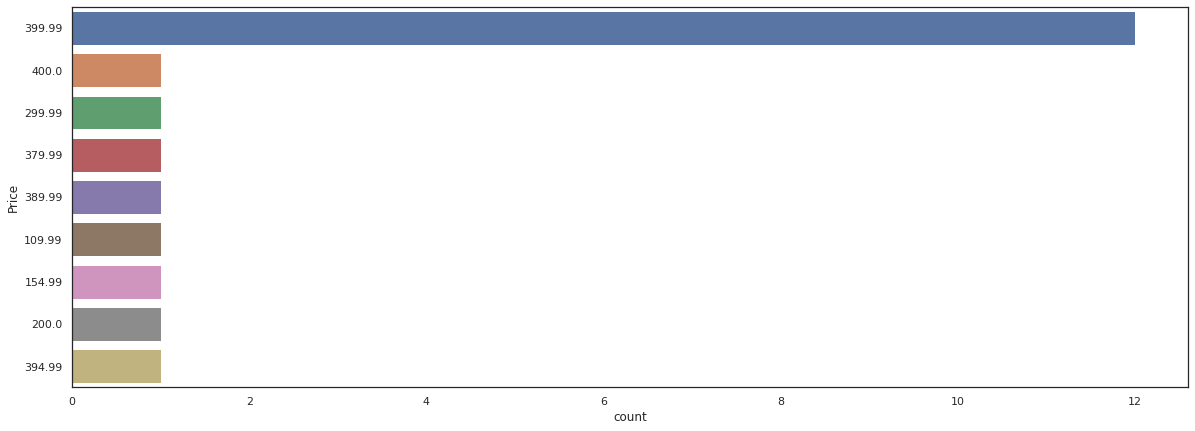

In [ ]:
plt.figure(figsize=(20,7))                               #Plotting a bar graph showing the number of installs vs Apps
sns.set_theme(style="white")
ax = sns.countplot(y='Price', data=Expen)                 #Using Expen dataframe which we created while cleaning Price column
ddf.sort_values(by='Price',ascending=False).head(3)    


**i'm Rich - Trump Edition	 is the most expensive application with 10000 installs**

Compute the total revenue earned from all the paid apps on the play store 

Q. How much google earned from the 5,000,000+ installed apps

### **2.Category**

Q. **Visualise Category distribution wrt. no of installs and infer the findings.** 

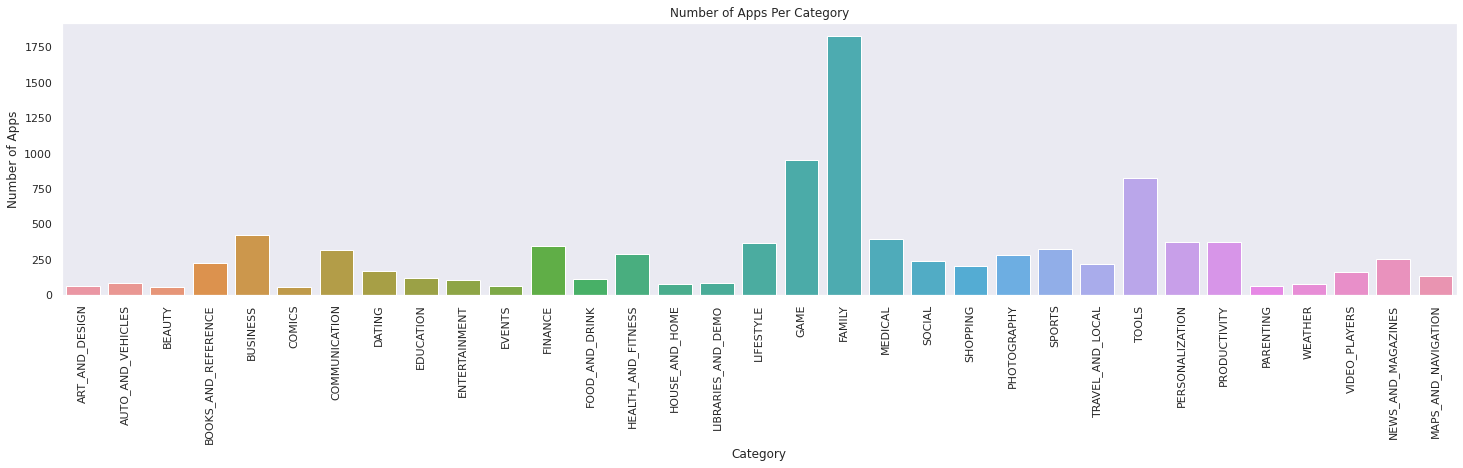

In [ ]:
sns.set_style('dark')
plt.figure(figsize=(25, 5))
sns.countplot(x='Category', data=ddf)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

*We can visually observe that **Family, Games** and  **Tools** have the maximum number of downloads.*

Q. Correlate the Category data with Generes and infer the findings. 

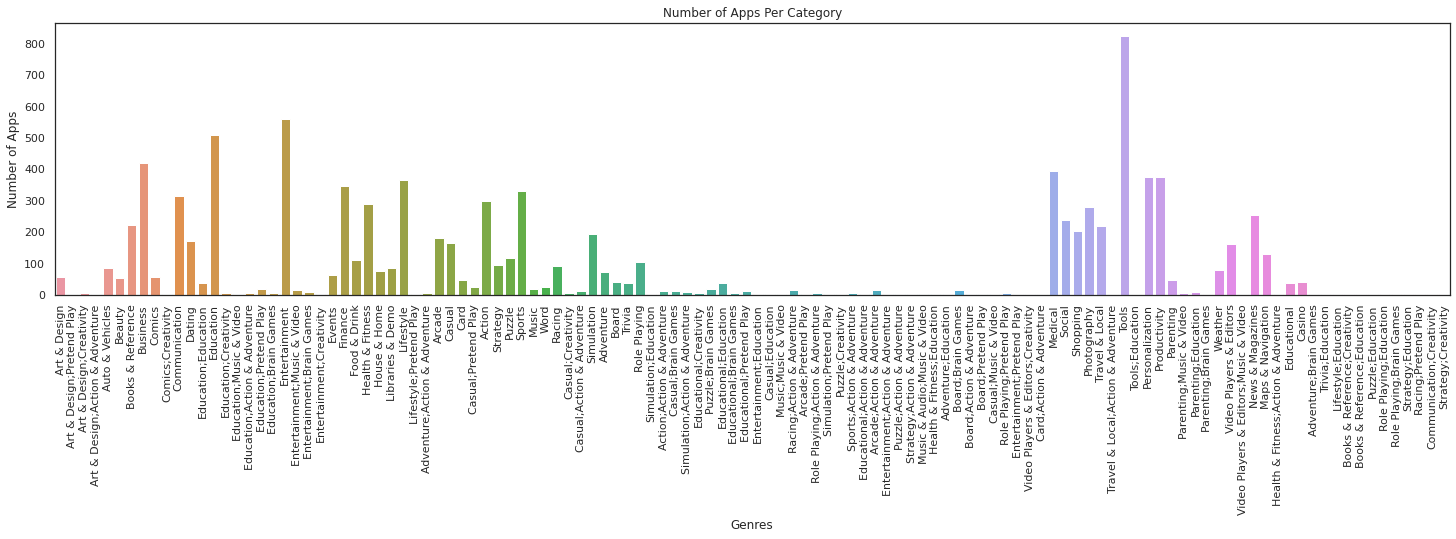

In [ ]:
sns.set_style('white')
plt.figure(figsize=(25, 5))
sns.countplot(x='Genres', data=ddf)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

*We Observe that **Tools, Entertainment** & **Education** are the top performing apps*



**It will be safe to explore a correlation between entertainment apps for family as it might give us a usefull insight.**

In [ ]:
ddf.loc[(ddf['Genres']=='Entertainment') & (ddf['Category']=='FAMILY')].sort_values(by='Installs',ascending=False).describe()

,Rating,Reviews,Size,Installs,Price
count,469.000000,4.690000e+02,448.000000,4.690000e+02,469.000000
mean,4.116631,4.678630e+04,13.925223,2.101609e+06,3.533262
std,0.551785,2.522716e+05,17.767039,1.131801e+07,36.645201
min,1.600000,0.000000e+00,0.000000,1.000000e+00,0.000000
25%,3.900000,1.100000e+01,3.275000,1.000000e+03,0.000000
50%,4.300000,1.520000e+02,6.900000,1.000000e+04,0.000000
75%,4.400000,2.167000e+03,17.000000,1.000000e+05,0.000000
max,5.000000,3.213548e+06,99.000000,1.000000e+08,399.990000


We observe that apps with Genres entertainment and category family apps rank highly in the number of applications in the google store with a mean rating of 4.1, with mean reviews and installs higher than the 75% value of the respective catagory.

### **3.Content Rating**

Q. Visualise the rating distribution of the apps

Text(0.5, 1.0, 'Overall Rating of Apps')

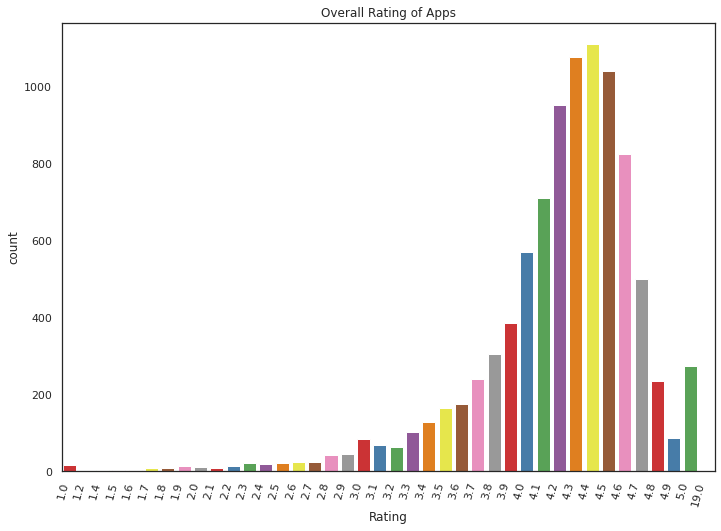

In [ ]:
rating_distribution = sns.countplot(x="Rating" , data=df, palette = "Set1")
rating_distribution.set_xticklabels(rating_distribution.get_xticklabels(), rotation=75, ha="right")
plt.title("Overall Rating of Apps")

Q. .What is the distribution of App's wrt. content rating ?

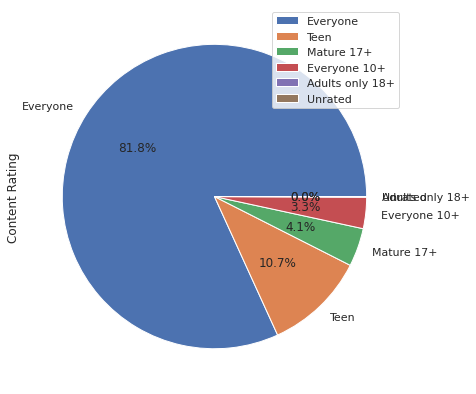

In [ ]:
ddf['Content Rating'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%')
plt.legend()

**From the above graph we can infer that 81.7 apps can be used by everyone other's app has age restrictions**

### **4. Application Rating**

Q. What are the 5 top rated apps.





In [ ]:
ddf[ddf['Rating']==5].shape # We observe that there are 265 app with max rating 

(265, 13)

We observe that there are 265 app with max rating, we will sort out analysis further by  number of intalls and number of reviews to get a better picture. 

In [ ]:
ddf[ddf['Rating']==5].sort_values(by=['Installs','Reviews'],ascending=False ,ignore_index=True).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10,3.0,10000,Free,0.0,Everyone,Entertainment,"June 26, 2017",1.0.9,4.0
1,Oración CX,LIFESTYLE,5.0,103,3.8,5000,Free,0.0,Everyone,Lifestyle,"September 12, 2017",5.1.10,4.1
2,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12.0,5000,Free,0.0,Everyone,Comics,"July 31, 2018",1.0.5,5.0
3,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3.2,5000,Free,0.0,Everyone,Tools,"June 13, 2018",1.1.3,4.3
4,Ríos de Fe,LIFESTYLE,5.0,141,15.0,1000,Free,0.0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1


In [ ]:
#top5_rating_app = top10PaidApps[['App', 'Installs']]

### **5.Application Reviews**

Q.Which are the Apps with the highest number of reviews?


In [ ]:
highest_review=ddf.sort_values(by='Reviews',ascending=False ).head()
highest_review

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2002,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
300,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2003,Instagram,SOCIAL,4.5,66577313,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
299,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1372,Clash of Clans,GAME,4.6,44891723,98.0,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1


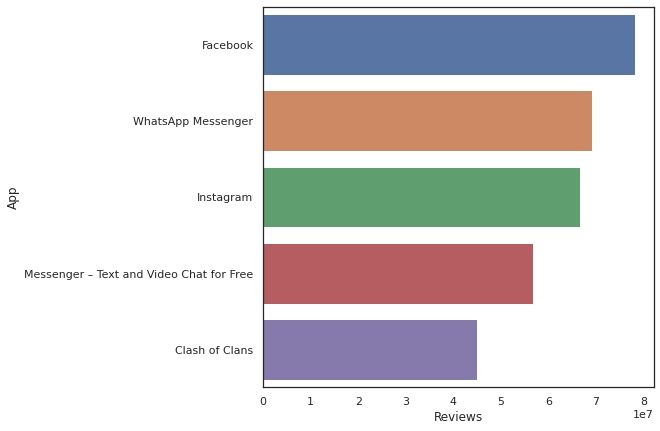

In [ ]:
top_review_app=highest_review.sort_values("Reviews",ascending=False,ignore_index=True).head(20)
plt.figure(figsize=(7,7))
sns.barplot(x="Reviews",y="App",data=top_review_app);

Q. How many apps have rating > 4.7 and what is thier avg price

### **6. Genre**

Q. What is the average price of the apps for each genre with each installs numbers.

### **7.Type**

 Q. What is the ratio of Free app vs Paid app

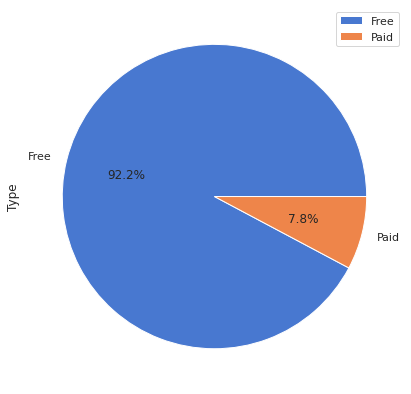

In [ ]:
ddf['Type'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%',colors = sns.color_palette('muted'))
plt.legend()

Q. Find Realtion between Category of Application and Type

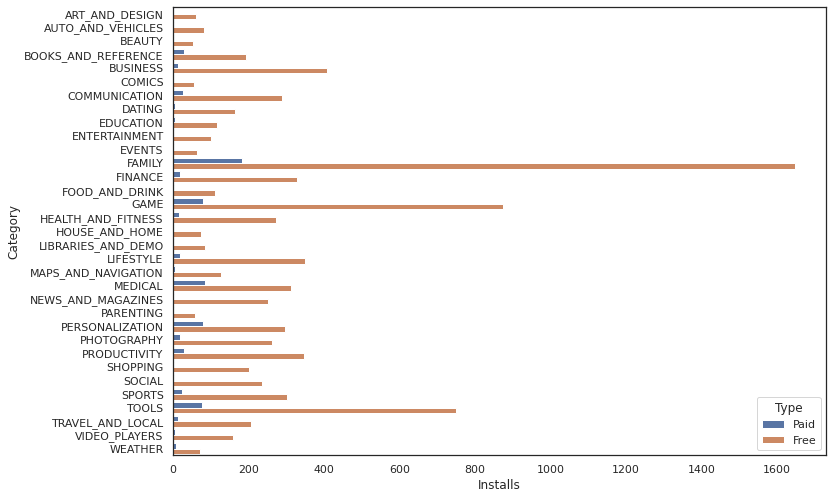

In [ ]:
price = ddf.groupby(['Category','Type'],as_index=False)['Installs'].count()
price=price.sort_values(['Category','Installs'])
sns.barplot(y="Category",x="Installs",hue="Type",data=price)

### **8. Installs**

Q. Which app has highest number of installs, what is the count of apps in the said range? 

In [ ]:
print(ddf['Installs'].max())


1000000000


In [ ]:
#Sorting Installs Value

print(ddf[ddf['Installs']==1000000000].shape)
ddf.sort_values(by='Installs',ascending= False).head(1)

(20, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device


Q. Plot a graph showing relation between no of Installs and Reviews

Text(0.5, 1.0, 'Is Increase of Installing Apps is Increase the Reviews?')

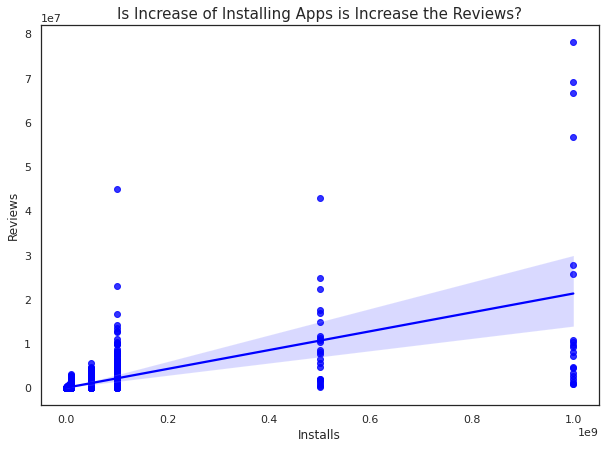

In [ ]:
plt.figure(figsize = (10,7))
sns.regplot(x="Installs", y="Reviews", color = 'blue',data=ddf);
plt.title('Is Increase of Installing Apps is Increase the Reviews?' ,size = 15)

### **9.Last Updated**	

### **10. Current Ver**

### **11. Android Ver**

 Q. How many apps that can work on android version 4.2

In [ ]:
android_ver=ddf[ddf['Android Ver']=='4.2']
android_ver

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.00,Teen,Art & Design,"June 8, 2018",Varies with device,4.2
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.00,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,7774,17.0,100000,Free,0.00,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2
64,DMV Permit Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9,6090,27.0,100000,Free,0.00,Everyone,Auto & Vehicles,"July 3, 2018",1.7,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,FP Live,COMMUNICATION,4.3,0,3.3,10,Free,0.00,Teen,Communication,"November 3, 2017",1.2.4,4.2
9579,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2
9586,NFP 2018,EVENTS,4.8,8,16.0,500,Free,0.00,Everyone,Events,"January 9, 2018",1.0.3,4.2
9623,Scoreboard FR,LIFESTYLE,4.3,3,15.0,100,Free,0.00,Everyone,Lifestyle,"August 7, 2018",2.1,4.2


### **12. Size**

Q. Visualise Size vs No. of Apps plot and determine the Size bracket with maximum number of Apps. 

In [ ]:
# We are creating a Size_df to plot a size interval and value graph. 
Size_df = ddf.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')
Size_df2 = Size_var.Size.rename_axis('unique_values').reset_index(name='counts').sort_values(by='counts')





#Dropping null values from the size 
Size_df.dropna(inplace =True)

# Creating a Size_interval column 
Size_df.loc[(Size_df['counts']>=0 ) & (Size_df['counts']<=10),'Size_interval' ] = '0-10'
Size_df.loc[(Size_df['counts']>=10) & (Size_df['counts']<=20),'Size_interval' ] = '10-20'
Size_df.loc[(Size_df['counts']>=20) & (Size_df['counts']<=30),'Size_interval' ] = '20-30'
Size_df.loc[(Size_df['counts']>=30) & (Size_df['counts']<=40),'Size_interval' ] = '30-40'
Size_df.loc[(Size_df['counts']>=40) & (Size_df['counts']<=50),'Size_interval' ] = '40-50'
Size_df.loc[(Size_df['counts']>=50) & (Size_df['counts']<=60),'Size_interval' ] = '50-60'
Size_df.loc[(Size_df['counts']>=60) & (Size_df['counts']<=70),'Size_interval' ] = '60-70'
Size_df.loc[(Size_df['counts']>=70) & (Size_df['counts']<=80),'Size_interval' ] = '70-80'
Size_df.loc[(Size_df['counts']>=80) & (Size_df['counts']<=90),'Size_interval' ] = '80-90'
Size_df.loc[(Size_df['counts']>=90) & (Size_df['counts']<=100),'Size_interval'] ='90-100'


#Creating a column for Size_interval for 'Varies with device' DataFrame
Size_df2['Size_interval']=Size_df2['counts']


# Appending the 'Varies with device' DataFrame
Size_df=Size_df.append(Size_df2).reset_index()

# PLotting a size interval graph


Size_df['Size_interval'].value_counts().plot.barh(figsize=(15,5), color='Blue').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

### **13.Correlation**

 Q. Is there a correlation between rating, Reviews, Size with the price of the app

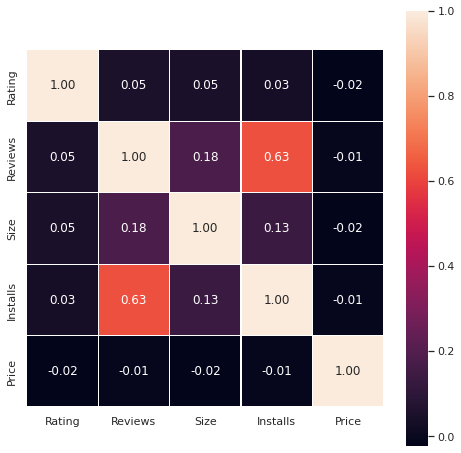

In [ ]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(ddf.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

**Looking at above chart we can infer that there are 92.2% free apps & only 7.8% paid apps on google playstore**

### **14. Outliers**

***************


# **Play store review dataset**

In [ ]:
##Reading the .csv file

play_store_review=pd.read_csv('/content/drive/MyDrive/Datasets/GG/User Reviews.csv')

In [ ]:
##Top five rows of the column 

play_store_review.head()

In [ ]:
#last five rows of the data

play_store_review.tail()

In [ ]:
#Checking the null values 

play_store_review.isnull().sum()

In [ ]:
#Rows and column of our data 

play_store_review.shape

# **Analysing Review column**

In [ ]:
play_store_review[play_store_review['Translated_Review'].isnull()]

# There are many null values in the data set, but if the person has not given the review we can't understand the 
1) Sentiment,  
2) Sentiment_Polarity 

3) Sentiment_Subjectivity of the rewiew

## so it's better to remove the null values from the data 

In [ ]:
# Dropping the null values 

play_store_review.dropna(inplace=True)

In [ ]:
#Checking null values again 

play_store_review.isnull().sum()

## Exploratory Data Analysis

In [ ]:
play_store_review['Sentiment'].value_counts().plot.pie(figsize = (10,7), autopct='%1.1f%%',colors = sns.color_palette('muted'))
plt.legend()

In [ ]:
positive_reviews=play_store_review[play_store_review['Sentiment']=='Positive']
positive_reviews

In [ ]:
positive_reviews.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='pink').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

In [ ]:
play_store_review['Sentiment_Polarity'].max()

In [ ]:
highest_sp=play_store_review[play_store_review['Sentiment_Polarity']>=0.7]

In [ ]:
highest_sp.groupby('App')['Sentiment_Polarity'].value_counts().nlargest(20).plot.barh(figsize=(20,8), color='blue').invert_yaxis()

In [ ]:
minimum_sp=play_store_review[play_store_review['Sentiment_Polarity']==0 ]

In [ ]:
minimum_sp

In [ ]:
minimum_sp.groupby('App')['Sentiment_Polarity'].value_counts().nlargest(20).plot.barh(figsize=(20,8), color='green').invert_yaxis()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in play_store_review.Translated_Review.values:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)